### Importing necessary Libraries

In [24]:
import numpy as np #Linear Algebra
import pandas as pd #data processing
import geopandas as gpd
import seaborn as sns #Data Visualisation 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import datetime as dt

import warnings


warnings.filterwarnings("ignore")

### Importing Dataset

In [25]:
df = pd.read_csv('NewTaxiProject.csv')


In [26]:
del df['total_amount']

In [27]:
!pip install dataframe_image
import dataframe_image as dfi
#dfi.export(data_df, "table.png")

In [22]:
pd.set_option("display.max_column", None)
pd.set_option("display.max_colwidth", None)

import dataframe_image as dfi



dfi.export(df.describe(), "Datadescribe.png")

### Exploring the Dataset 

In [28]:
df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171,CSH,6.5,0.0,0.5,0.0,0.0
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660,CSH,6.0,0.5,0.5,0.0,0.0
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002,CSH,5.5,1.0,0.5,0.0,0.0
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388,CSH,5.0,0.5,0.5,0.0,0.0
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868,CSH,9.5,0.5,0.5,0.0,0.0


In [6]:
df.dtypes

medallion              object
hack_license           object
vendor_id              object
rate_code               int64
store_and_fwd_flag     object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_time_in_secs       int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
payment_type           object
fare_amount           float64
surcharge             float64
mta_tax               float64
tip_amount            float64
tolls_amount          float64
dtype: object

In [7]:
df.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount
count,999976.000000,999976.000000,999976.000000,999976.000000,999976.000000,999976.000000,999976.000000,999976.000000,999976.000000,999976.000000,999976.000000,999976.000000,999976.000000
mean,1.046638,1.260030,694.638613,3.047070,-72.605140,39.994242,-72.633193,40.010083,12.451750,0.312853,0.497018,2.421499,0.238771
std,0.444793,0.594976,478.751539,3.457231,9.974924,5.494918,9.875289,5.440268,10.339482,0.352207,0.038499,2.246314,1.121305
min,0.000000,0.000000,0.000000,0.000000,-87.418953,0.000000,-87.085808,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,371.000000,1.100000,-73.992737,40.732872,-73.992149,40.731670,6.500000,0.000000,0.500000,1.110000,0.000000
50%,1.000000,1.000000,583.000000,1.900000,-73.982239,40.750507,-73.981049,40.751083,9.500000,0.000000,0.500000,1.900000,0.000000
75%,1.000000,1.000000,886.000000,3.400000,-73.967392,40.766590,-73.964630,40.767532,14.000000,0.500000,0.500000,2.750000,0.000000
max,210.000000,6.000000,9989.000000,100.000000,11.047888,50.712997,0.000000,67.086899,500.000000,2.500000,0.500000,150.000000,20.000000


In [29]:
df.shape

(999976, 20)

In [8]:
df.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'payment_type', 'fare_amount', 'surcharge',
       'mta_tax', 'tip_amount', 'tolls_amount'],
      dtype='object')

In [9]:
df.isnull().sum()

medallion             0
hack_license          0
vendor_id             0
rate_code             0
store_and_fwd_flag    0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
trip_time_in_secs     0
trip_distance         0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
payment_type          0
fare_amount           0
surcharge             0
mta_tax               0
tip_amount            0
tolls_amount          0
dtype: int64

In [10]:
df.nunique()

medallion               6572
hack_license           16025
vendor_id                  1
rate_code                  8
store_and_fwd_flag         2
pickup_datetime       558059
dropoff_datetime      558957
passenger_count            7
trip_time_in_secs       4434
trip_distance            503
pickup_longitude       20596
pickup_latitude        41709
dropoff_longitude      27558
dropoff_latitude       54970
payment_type               4
fare_amount              490
surcharge                  6
mta_tax                    2
tip_amount              1579
tolls_amount             196
dtype: int64

In [11]:
#let's change datatype
df['pickup_datetime'] = df['pickup_datetime'].astype('datetime64[ns]')
df['dropoff_datetime'] = df['dropoff_datetime'].astype('datetime64[ns]')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')


In [12]:
df.dtypes

medallion                     object
hack_license                  object
vendor_id                     object
rate_code                      int64
store_and_fwd_flag          category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
trip_time_in_secs              int64
trip_distance                float64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
payment_type                  object
fare_amount                  float64
surcharge                    float64
mta_tax                      float64
tip_amount                   float64
tolls_amount                 float64
dtype: object

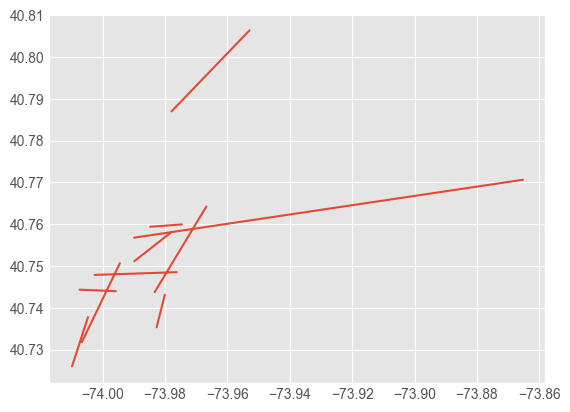

In [13]:
#visualise taxi rides
import seaborn as sns
def showrides(df, numlines):
  lats = []
  lons = []
  goodrows = df[df['pickup_longitude'] < -70]
  for iter, row in goodrows[:numlines].iterrows():
    lons.append(row['pickup_longitude'])
    lons.append(row['dropoff_longitude'])
    lons.append(None)
    lats.append(row['pickup_latitude'])
    lats.append(row['dropoff_latitude'])
    lats.append(None)

  plt.plot(lons, lats)

showrides(df, 10)

##Some taxi trips are small and some are long 

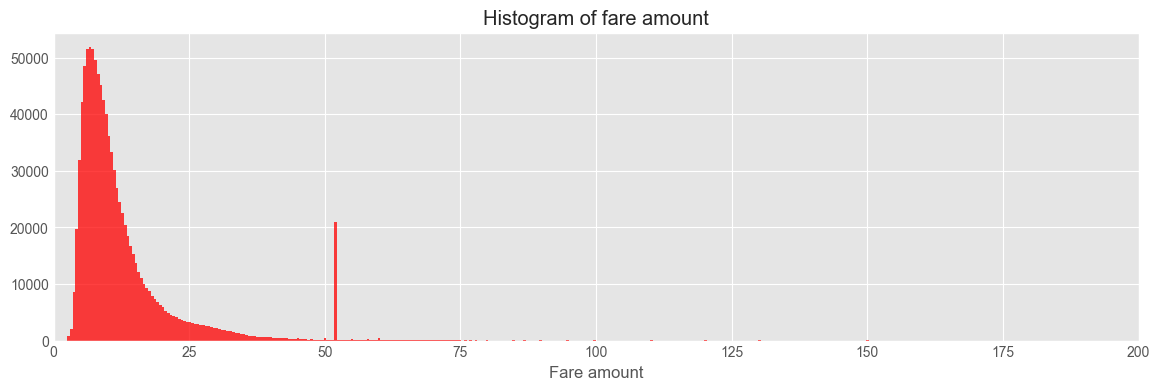

In [14]:
plt.figure(figsize = (14, 4))
n, bins, patches = plt.hist(df.fare_amount, 1000, facecolor='red', alpha=0.75)
plt.xlabel('Fare amount')
plt.title('Histogram of fare amount')
plt.xlim(0, 200)
plt.show();

In [15]:
df.groupby('fare_amount').size().nlargest(10)

fare_amount
6.5    51810
6.0    51483
7.0    51469
7.5    49551
5.5    48510
8.0    47035
8.5    45180
9.0    42581
5.0    42125
9.5    40097
dtype: int64

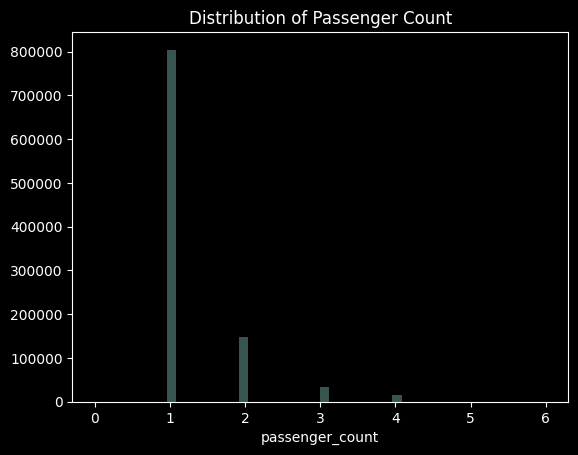

In [15]:
plt.style.use("dark_background")
sns.distplot(df['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

In [16]:
df.groupby('passenger_count').size()

passenger_count
0         3
1    804445
2    146831
3     33354
4     14910
5       407
6        26
dtype: int64

<AxesSubplot: xlabel='passenger_count', ylabel='trip_distance'>

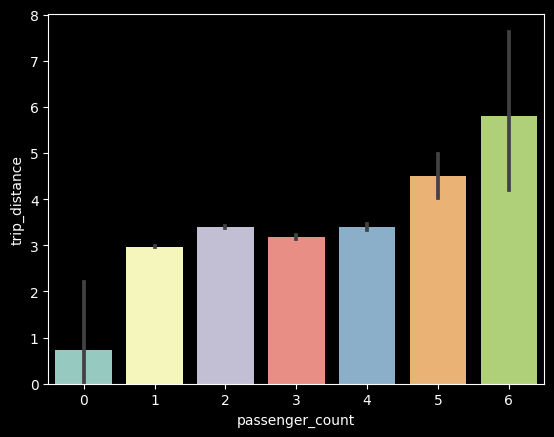

In [17]:
sns.barplot(x = 'passenger_count',y ='trip_distance',data=df)

In [18]:
x=df['store_and_fwd_flag'].value_counts()
x

N    983110
Y     16866
Name: store_and_fwd_flag, dtype: int64

Text(0.5, 1.0, 'Store and Forward Flag')

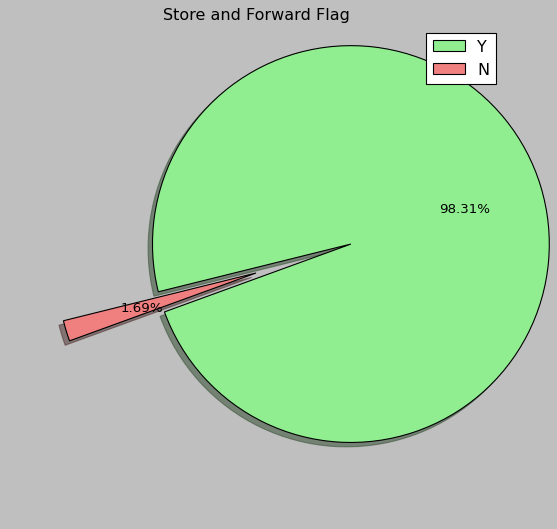

In [19]:
plt.style.use("classic")
plt.figure(figsize=(8,8))
plt.pie(x, colors=['lightgreen', 'lightcoral'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['Y','N'])
plt.title("Store and Forward Flag")

In [20]:
df['store_and_fwd_flag']=df['store_and_fwd_flag'].apply(lambda x : 0 if x=='N' else 1)

In [21]:
#Simple Rate calculation
#!pip install -U scikit-learn scipy matplotlib
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=42)


In [22]:
import numpy as np
import shutil

def distance_between(lat1, lon1, lat2, lon2):
     # Haversine formula to compute distance 
  dist = np.degrees(np.arccos(np.sin(np.radians(lat1)) * np.sin(np.radians(lat2)) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.cos(np.radians(lon2 - lon1)))) * 60 * 1.515 * 1.609344
  return dist

def estimate_distance(df):
  return distance_between(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

def compute_rmse(actual, predicted):
  return np.sqrt(np.mean((actual - predicted)**2))

def print_rmse(df, rate, name):
  print("{1} RMSE = {0}".format(compute_rmse(df['fare_amount'], rate * estimate_distance(df)), name))

In [23]:
rate = train['fare_amount'].mean() / estimate_distance(train).mean()

print("Rate = ${0}/km".format(rate))
print_rmse(train, rate, 'Train')
print_rmse(test, rate, 'Test')

Rate = $0.8242719085266287/km
Train RMSE = 283.8357803562665
Test RMSE = 276.9979411318129


This clear shows us RootMeanSquareDeviation(RMSE) for test set is $276.997.

### Let us Explore the Date time and expand into weekday, month ,hour, minute to get a bigger picture while doing Analysis in our Data


In [24]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [25]:
#extracting day of week (mon-sun)
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['dropoff_day'] = df['dropoff_datetime'].dt.day_name()
#extracting day of the weekday
df['pickup_day_no'] = df['pickup_datetime'].dt.weekday
df['dropoff_day_no'] = df['dropoff_datetime'].dt.weekday
#Extracting month of the month
df['p_month'] = df['pickup_datetime'].dt.month_name()
df['d_month'] = df['dropoff_datetime'].dt.month_name()
# Creating features based on Hour
df['pickup_by_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_by_hour'] = df['dropoff_datetime'].dt.hour

In [26]:
df['pickup_day'].value_counts()

Saturday     196652
Sunday       180207
Friday       175043
Tuesday      150543
Monday       105450
Thursday     103634
Wednesday     88447
Name: pickup_day, dtype: int64

In [27]:
df['dropoff_day'].value_counts()

Saturday     196309
Sunday       181866
Friday       173357
Tuesday      150874
Monday       105851
Thursday     103339
Wednesday     88380
Name: dropoff_day, dtype: int64

In [29]:
def part_of_day (t):
    if t in range (6,12):
        return "Morning"
    elif t in range (12,16):
        return "Afternoon"
    elif t in range (16,22):
        return "Evening"
    else:
        return "Night"

In [30]:
df['pickup_partofday'] = df['pickup_by_hour'].apply(part_of_day)
df['dropoff_partofday'] = df['dropoff_by_hour'].apply(part_of_day)

In [31]:
df['pickup_partofday'].value_counts()

Evening      334127
Night        255746
Morning      228027
Afternoon    182076
Name: pickup_partofday, dtype: int64

In [32]:
df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,p_month,d_month,pickup_by_hour,dropoff_by_hour,pickup_partofday,dropoff_partofday
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,0,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,...,Tuesday,Tuesday,1,1,January,January,15,15,Afternoon,Afternoon
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,0,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,...,Sunday,Sunday,6,6,January,January,0,0,Night,Night
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,0,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,...,Saturday,Saturday,5,5,January,January,18,18,Evening,Evening
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,0,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,...,Monday,Monday,0,0,January,January,23,23,Night,Night
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,0,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,...,Monday,Monday,0,0,January,January,23,23,Night,Night


In [23]:
pd.set_option("display.max_column", None)
pd.set_option("display.max_colwidth", None)

import dataframe_image as dfi



dfi.export(df.head(), "Datahead_newdataadded.png")

<AxesSubplot: >

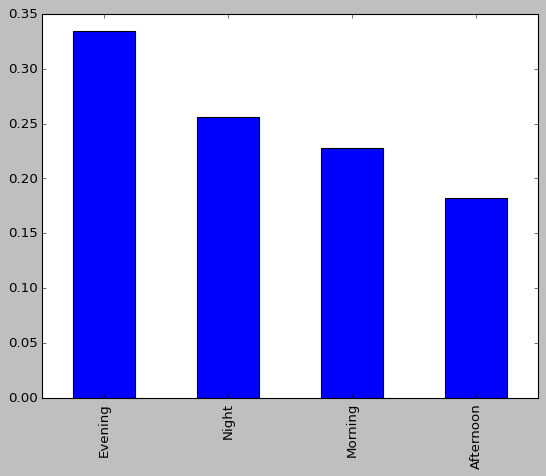

In [33]:
#df['dropoff_partofday'].value_counts(normalize = True).plot(kind = 'bar')
df['pickup_partofday'].value_counts(normalize = True).plot(kind = 'bar')

 Evening time is the most busiest Time followed by Night and then Morning which makes sense as most people leave from office in evening and and few in Night and people have to reach office in morning and very less people travel in afternoon that's in afternoon it's less busy.

### Trips Per day

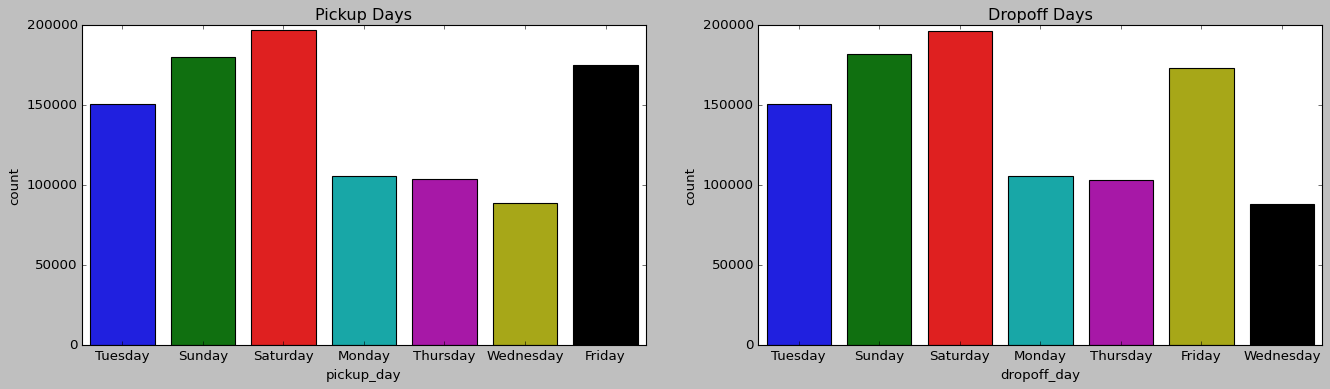

In [34]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=df,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=df,ax=ax2)

In [35]:
# Creating two new features called pickup_part_of_day and dropoff_part_of_day.

df['pickup_part_of_day']=df['pickup_by_hour'].apply(part_of_day)
df['dropoff_part_of_day']=df['dropoff_by_hour'].apply(part_of_day)

In [36]:
# Check to see if the formula has been applied correctly 

df[['pickup_part_of_day','dropoff_part_of_day']].head()
df

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_day_no,dropoff_day_no,p_month,d_month,pickup_by_hour,dropoff_by_hour,pickup_partofday,dropoff_partofday,pickup_part_of_day,dropoff_part_of_day
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,0,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,...,1,1,January,January,15,15,Afternoon,Afternoon,Afternoon,Afternoon
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,0,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,...,6,6,January,January,0,0,Night,Night,Night,Night
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,0,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,...,5,5,January,January,18,18,Evening,Evening,Evening,Evening
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,0,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,...,0,0,January,January,23,23,Night,Night,Night,Night
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,0,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,...,0,0,January,January,23,23,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999971,B8F7DF6571061CB9FE56FCB47CCBFB56,D59F36B8E5D07E7E8334502BB2335212,CMT,1,0,2013-01-08 17:08:54,2013-01-08 17:23:07,1,853,2.9,...,1,1,January,January,17,17,Evening,Evening,Evening,Evening
999972,6F506ED1BE0832385B9810F08B1E6466,D5C15D63D909DF7A66453C2E9AE29930,CMT,1,0,2013-01-08 18:31:11,2013-01-08 18:43:20,1,729,2.1,...,1,1,January,January,18,18,Evening,Evening,Evening,Evening
999973,9D00885D2304874EFB6F7A2070986452,FC8C39EC2AFF41C066D3EE63DC9C61E2,CMT,1,0,2013-01-08 20:18:45,2013-01-08 20:44:44,1,1559,4.7,...,1,1,January,January,20,20,Evening,Evening,Evening,Evening
999974,BBEFF42C6DF9D215155BBBFF7A0D77FA,FEDAD918D5A1CFAFEBCBD63F6AE282D3,CMT,1,0,2013-01-08 18:21:54,2013-01-08 18:54:38,1,1964,1.2,...,1,1,January,January,18,18,Evening,Evening,Evening,Evening


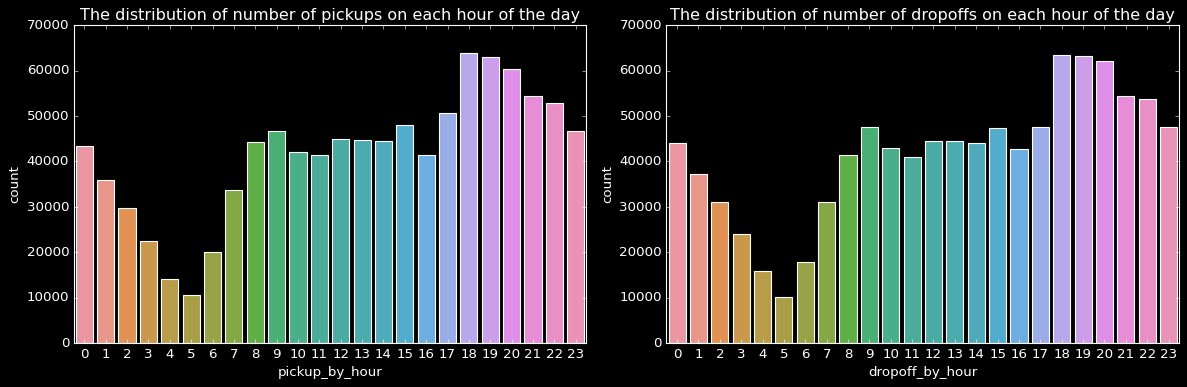

In [38]:
plt.style.use("dark_background")
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(x='pickup_by_hour',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each hour of the day')
sns.countplot(x='dropoff_by_hour',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each hour of the day')
plt.tight_layout()
     

Text(0.5, 1.0, 'Correlation Plot')

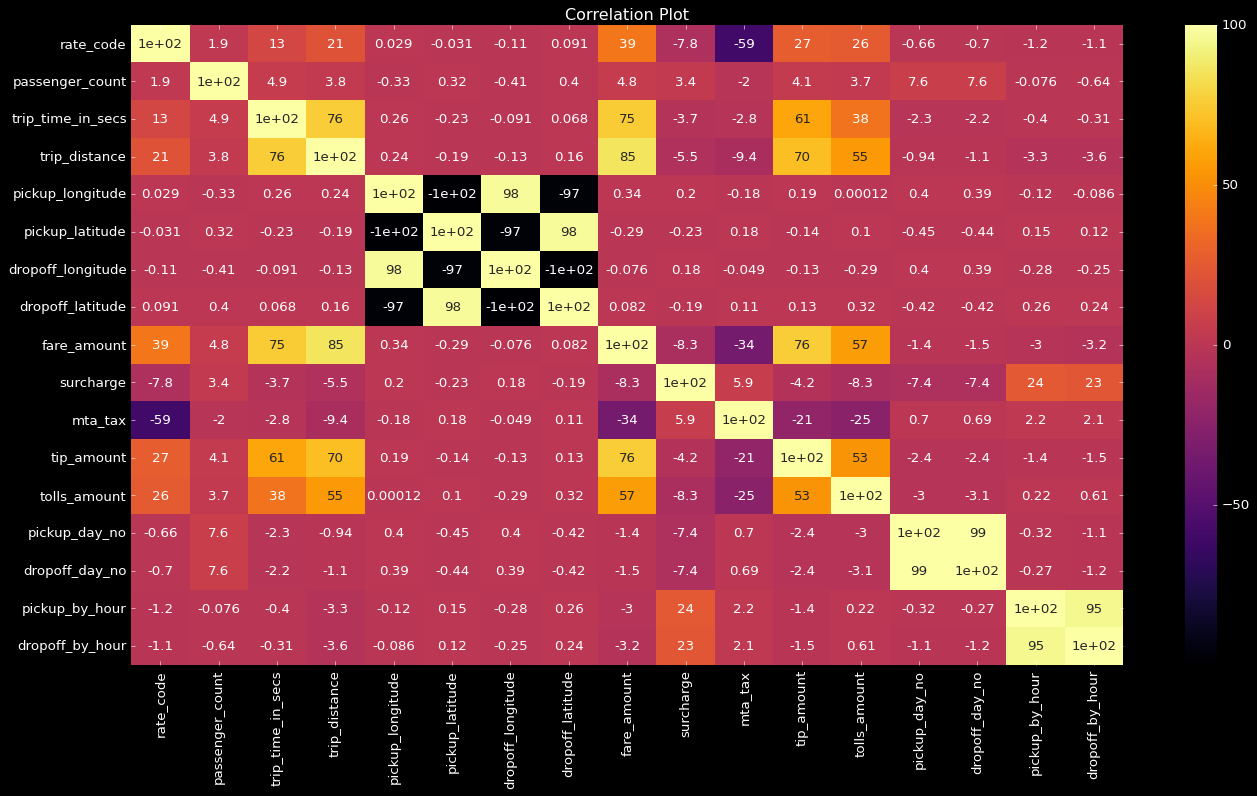

In [41]:
plt.style.use("dark_background")
plt.figure(figsize=(20,10))
sns.heatmap(df.corr()*100, annot=True, cmap='inferno')
plt.title('Correlation Plot')

### TripDistance

In [114]:
#a function is created to calculate the distance from latitudes and longitudes
from math import radians, cos, sin, asin, sqrt
def haversine(df):
    lat1, lon1, lat2, lon2 = df.pickup_latitude,df.pickup_longitude,df.dropoff_latitude,df.dropoff_longitude 
    R = 3959.87433 # this is in miles.  For Earth radius in kilometers use 6372.8 km
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    return R * c

In [115]:
df['distance'] = df.apply(lambda x: haversine(x), axis = 1)

<AxesSubplot: xlabel='distance', ylabel='trip_distance'>

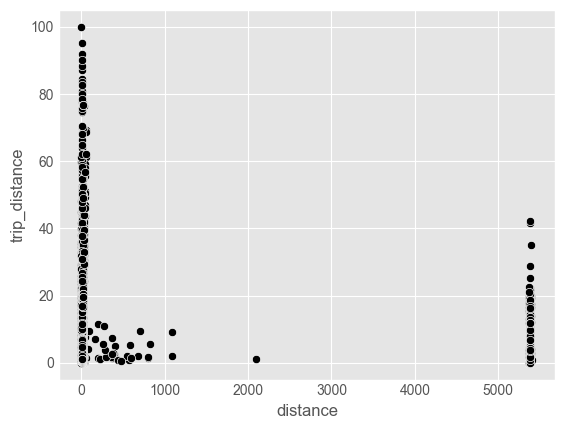

In [116]:
sns.scatterplot(x='distance',y='trip_distance',data=df,color = 'black')

In [120]:
print('The no of rows with distance =0 are {}'.format(len(df[df.distance==0])))

The no of rows with distance =0 are 0


That’s quite a number! We will not drop these rows. Rather we will replace these datas with the average distance

In [121]:
mean_dist=df['distance'].mean()
df.loc[df['distance']==0,'distance']=mean_dist

We will now create a new feature called speed. This will help us in identifying data points where time taken and distance covered does not match up. We will also have a look at the distribution of trip speed.

In [122]:
df.columns
#del df['speed']

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'payment_type', 'fare_amount', 'surcharge',
       'mta_tax', 'tip_amount', 'tolls_amount', 'pickup_day', 'dropoff_day',
       'pickup_day_no', 'dropoff_day_no', 'p_month', 'd_month',
       'pickup_by_hour', 'dropoff_by_hour', 'pickup_partofday',
       'dropoff_partofday', 'pickup_part_of_day', 'dropoff_part_of_day',
       'distance'],
      dtype='object')

In [123]:
#!pip install geopy
from geopy.distance import great_circle
def distance_trip(pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude):
    start_coordinates = (pickup_longitude,pickup_latitude)
    stop_coordinates = (dropoff_longitude,dropoff_latitude)
    return great_circle(start_coordinates,stop_coordinates).km

In [124]:
df['distance'] = df.apply(lambda x: distance_trip(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']), axis=1)

In [125]:
df.dtypes

medallion                      object
hack_license                   object
vendor_id                      object
rate_code                       int64
store_and_fwd_flag           category
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
trip_time_in_secs               int64
trip_distance                 float64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
payment_type                   object
fare_amount                   float64
surcharge                     float64
mta_tax                       float64
tip_amount                    float64
tolls_amount                  float64
pickup_day                     object
dropoff_day                    object
pickup_day_no                   int64
dropoff_day_no                  int64
p_month                        object
d_month                        object
pickup_by_ho

### Let us Now see the Correlation b/w different variables in our Dataset



In [61]:
numerical = df.select_dtypes(include =['int64','float64','Int64'])[:]
numerical.dtypes

rate_code              int64
passenger_count        int64
trip_time_in_secs      int64
trip_distance        float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
fare_amount          float64
surcharge            float64
mta_tax              float64
tip_amount           float64
tolls_amount         float64
distance             float64
dtype: object

In [62]:
correlation = numerical.dropna().corr()
correlation

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,distance
rate_code,1.000000,0.019143,0.128962,0.210538,0.000289,-0.000307,-0.001098,0.000910,0.392990,-0.077875,-0.594938,0.265954,0.255200,0.010491
passenger_count,0.019143,1.000000,0.049497,0.038089,-0.003326,0.003170,-0.004109,0.003996,0.047881,0.033702,-0.019716,0.040750,0.037168,0.005207
trip_time_in_secs,0.128962,0.049497,1.000000,0.761696,0.002570,-0.002265,-0.000914,0.000683,0.754007,-0.037467,-0.027940,0.609114,0.382354,0.030712
trip_distance,0.210538,0.038089,0.761696,1.000000,0.002447,-0.001873,-0.001296,0.001604,0.853624,-0.055374,-0.093674,0.702393,0.553500,0.030593
pickup_longitude,0.000289,-0.003326,0.002570,0.002447,1.000000,-0.999908,0.975004,-0.974926,0.003365,0.001967,-0.001777,0.001903,0.000001,0.157417
pickup_latitude,-0.000307,0.003170,-0.002265,-0.001873,-0.999908,1.000000,-0.974961,0.975001,-0.002887,-0.002348,0.001842,-0.001429,0.000996,-0.157337
dropoff_longitude,-0.001098,-0.004109,-0.000914,-0.001296,0.975004,-0.974961,1.000000,-0.999888,-0.000758,0.001759,-0.000494,-0.001273,-0.002860,0.065488
dropoff_latitude,0.000910,0.003996,0.000683,0.001604,-0.974926,0.975001,-0.999888,1.000000,0.000824,-0.001909,0.001146,0.001315,0.003240,-0.065387
fare_amount,0.392990,0.047881,0.754007,0.853624,0.003365,-0.002887,-0.000758,0.000824,1.000000,-0.083478,-0.343940,0.763768,0.568020,0.031147
surcharge,-0.077875,0.033702,-0.037467,-0.055374,0.001967,-0.002348,0.001759,-0.001909,-0.083478,1.000000,0.059438,-0.042008,-0.083156,-0.003946


In [66]:
c = numerical.corr().abs()
s = c.unstack()
so = s.sort_values(kind = 'quicksort', ascending = False)
so = pd.DataFrame(so,columns=['Pearson Coeficient'])

In [67]:
so[so['Pearson Coeficient']<1].head(25)

Pearson Coeficient
pickup_longitude  pickup_latitude              0.999908
pickup_latitude   pickup_longitude             0.999908
dropoff_longitude dropoff_latitude             0.999888
dropoff_latitude  dropoff_longitude            0.999888
dropoff_longitude pickup_longitude             0.975004
pickup_longitude  dropoff_longitude            0.975004
dropoff_latitude  pickup_latitude              0.975001
pickup_latitude   dropoff_latitude             0.975001
                  dropoff_longitude            0.974961
dropoff_longitude pickup_latitude              0.974961
dropoff_latitude  pickup_longitude             0.974926
pickup_longitude  dropoff_latitude             0.974926
fare_amount       trip_distance                0.853624
trip_distance     fare_amount                  0.853624
fare_amount       tip_amount                   0.763768
tip_amount        fare_amount                  0.763768
trip_time_in_secs trip_distance                0.761696
trip_distance     trip_time_in_secs            0.761696
trip_time_in_secs fare_amount                  0.754007
fare_amount       trip_time_in_secs            0.754007
tip_amount        trip_distance                0.702393
trip_distance     tip_amount                   0.702393
trip_time_in_secs tip_amount                   0.609114
tip_amount        trip_time_in_secs            0.609114
rate_code         mta_tax                      0.594938

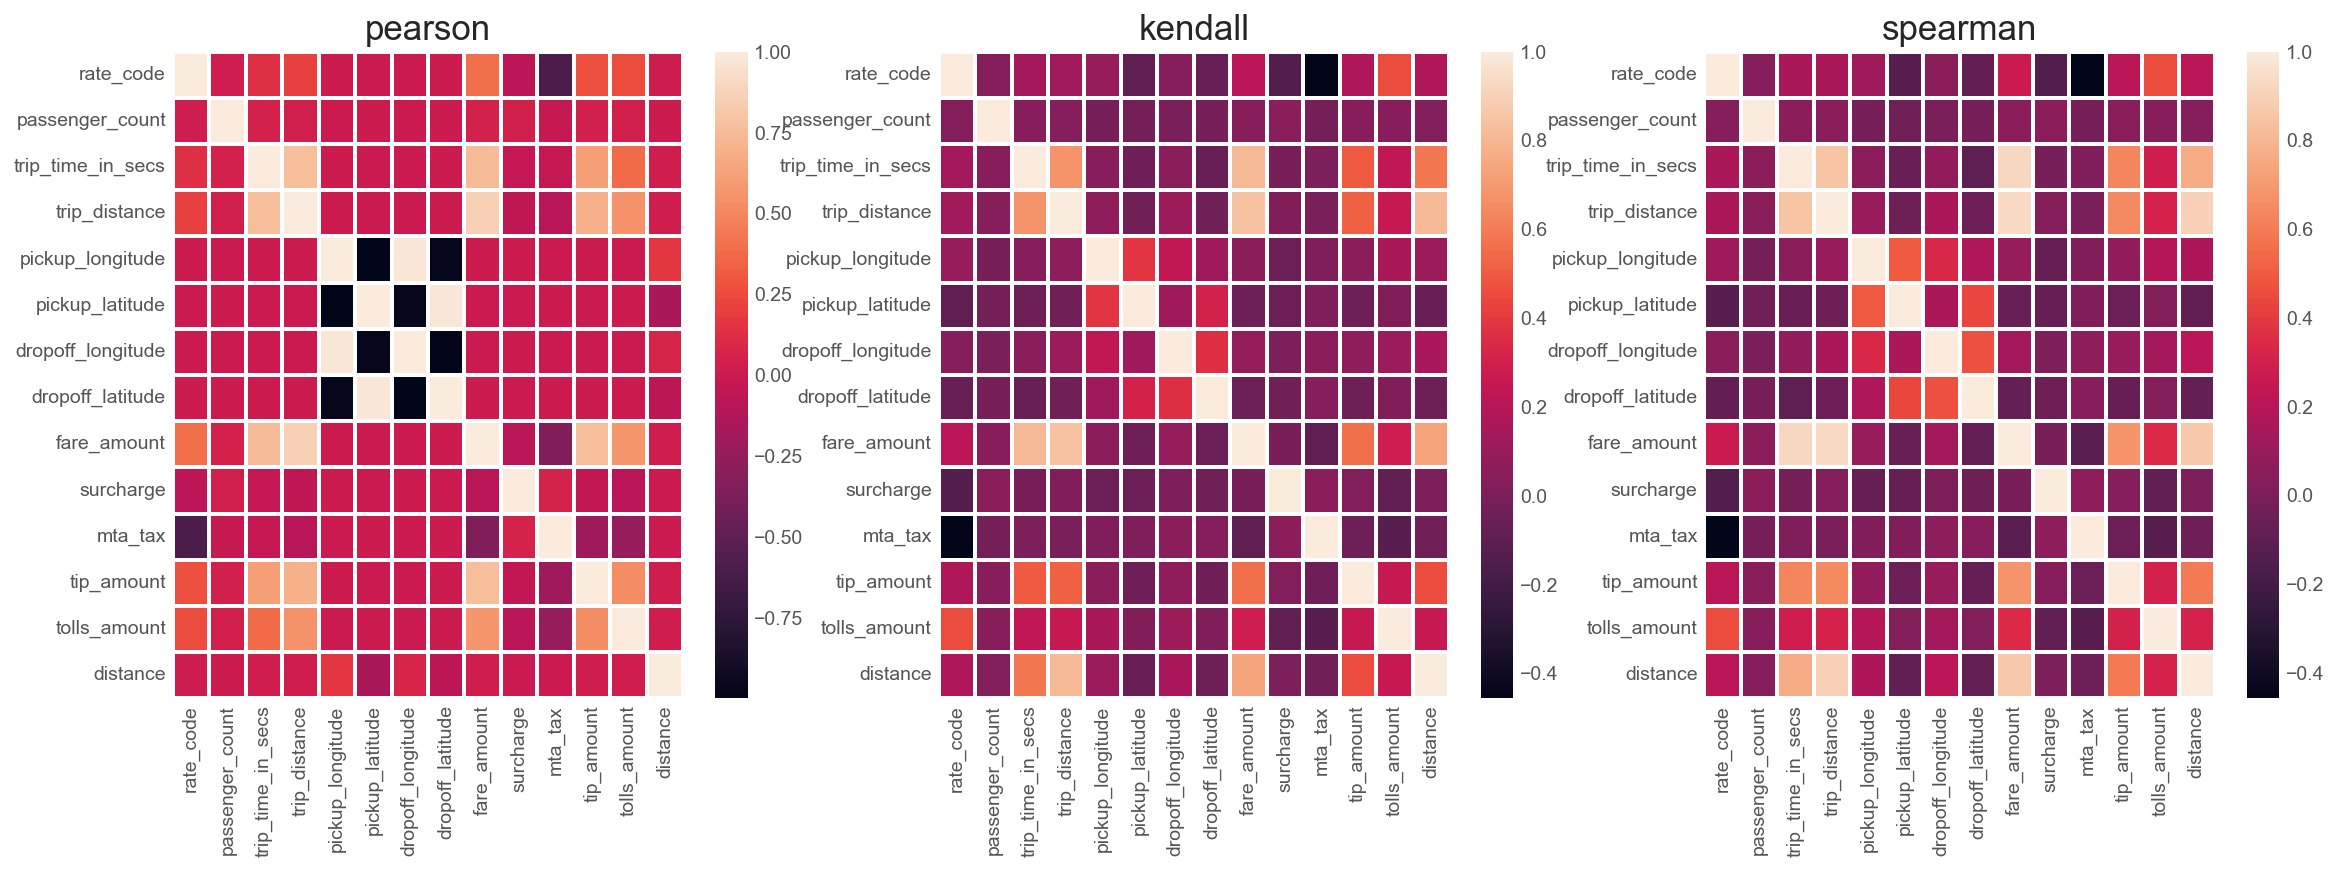

In [73]:
plt.figure(figsize=(20,6),dpi=140)
for j, i in enumerate(['pearson','kendall','spearman']):
    plt.subplot(1,3,j+1)
    correlation = numerical.dropna().corr(method=i)
    sns.heatmap(correlation, linewidth = 2)
    plt.title(i, fontsize = 18)

Kendall,& Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
* Too many variables with insignificant correlation.
* Major correlation lies between the drop off hour and pickup hour.

## the fare of a taxi trip given information about pickup and drop off locations, the pick up date time and the number of the passengers travelling in New York.

In [33]:
df.loc[df['fare_amount']>200].shape

(51, 20)

In [43]:
#New york latitude , longitude range
boundary={'min_lng':-74.5,
              'min_lat':40.7,
              'max_lng':-72.8, 
              'max_lat':41.8}

In [45]:
##  consider locations within New York City
for long_value in ['pickup_longitude', 'dropoff_longitude']:
  df = df[(df[long_value] > boundary['min_lng']) & (df[long_value] < boundary['max_lng'])]
for lat_value in ['pickup_latitude', 'dropoff_latitude']:
  df = df[(df[lat_value] > boundary['min_lat']) & (df[lat_value] <boundary['max_lat'])]

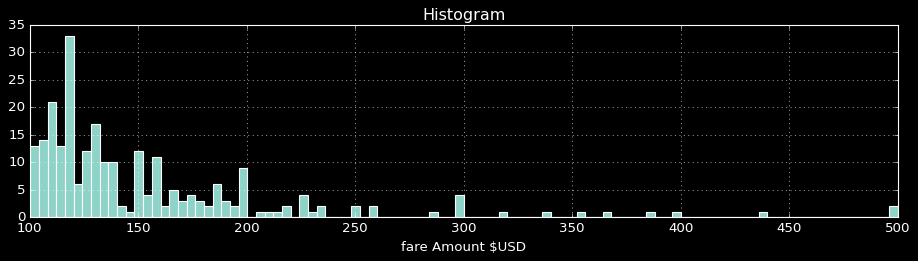

In [46]:
# plot histogram of fare
df[df['fare_amount']>100].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('fare Amount $USD')
plt.title('Histogram');

In [47]:
def distance_trip(latitude1,longitude1,latitude2,longitude2):
  r = 6373 # earth's radius
  latitude1 = np.deg2rad(latitude1)
  longitude1 = np.deg2rad(longitude1)
  latitude2 = np.deg2rad(latitude2)
  longitude2= np.deg2rad(longitude2)
  dlat = latitude2 - latitude1
  dlon = longitude2 - longitude1
  a = np.sin(dlat/2)**2 + np.cos(latitude1) * np.cos(latitude2) * np.sin(dlon/2)**2
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
  distance = r*c
  return distance
def direction_angle(latitude1,longitude1,latitude2,longitude2):
  dlon = longitude2 - longitude1
  x = np.cos(latitude2)* np.sin(dlon)
  y= np.cos(latitude1)* np.sin(latitude2) - np.sin(latitude1)*np.cos(latitude2) * np.cos(dlon)
  beta_en_radians = np.arctan2(x,y)
  beta_en_degres = np.rad2deg(beta_en_radians)
  return beta_en_degres

In [49]:
#distance away from  three major airports, Central park and Manhattan

airports = {'JFK': (-73.78,40.643),'LGA': (-73.87, 40.77),'EWR' : (-74.18, 40.69),'MNT':(-73.97,40.7831),'Cenpark':(-73.96,40.77)}
for airport in airports:
  df['pickup_dist_' + airport] = distance_trip(df['pickup_latitude'], df['pickup_longitude'], airports[airport][1], airports[airport][0])
  df['dropoff_dist_' + airport] = distance_trip(df['dropoff_latitude'], df['dropoff_longitude'], airports[airport][1], airports[airport][0])

In [51]:
#trip distance
df['trip_distance'] = distance_trip(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

In [53]:
#trip direction north south east west
df['direction'] = direction_angle(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

In [54]:
df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,dropoff_dist_JFK,pickup_dist_LGA,dropoff_dist_LGA,pickup_dist_EWR,dropoff_dist_EWR,pickup_dist_MNT,dropoff_dist_MNT,pickup_dist_Cenpark,dropoff_dist_Cenpark,direction
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,0,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.241150,...,21.398754,9.210086,10.311332,18.618462,17.415033,2.877828,3.925015,2.032320,3.271972,120.365644
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,0,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,2.337508,...,21.693557,12.276785,10.707449,15.334121,17.031486,6.491228,4.156837,5.791829,3.616037,-32.743231
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,0,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.378441,...,21.471899,11.902951,12.759166,15.705027,14.896237,5.828596,7.183328,5.200172,6.448607,156.598540
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,0,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.855882,...,21.578941,8.882869,9.737594,18.981752,18.179745,2.604538,2.914919,1.662560,2.394821,93.180439
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,0,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.220446,...,22.100266,9.264909,11.438738,18.368976,16.282786,3.881317,4.784705,2.752913,4.351291,91.511351


Text(0.5, 1.0, 'Histogram ride distances in miles')

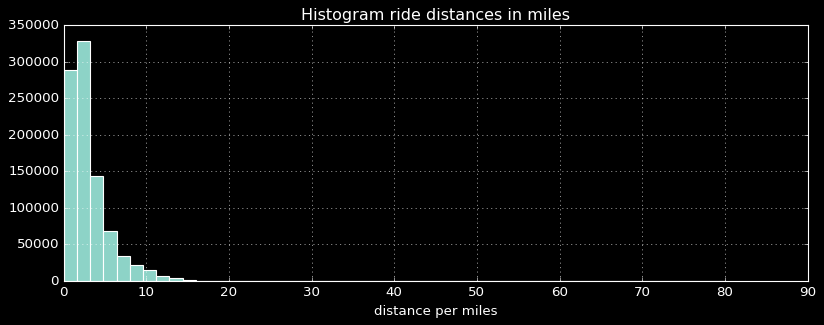

In [55]:
df.trip_distance.hist(bins=50, figsize=(12,4))
plt.xlabel('distance per miles')
plt.title('Histogram ride distances in miles')

In [56]:

df.groupby('passenger_count')['trip_distance', 'fare_amount'].mean()

,trip_distance,fare_amount
passenger_count,,
0,0.005188,60.000000
1,2.987959,10.788808
2,3.188892,11.604950
3,3.085856,11.377877
4,3.193081,11.951667
5,3.657328,15.513190
6,5.175653,26.255000


In [57]:
print("Average $USD/Mile(Km) : {:0.2f}".format(df.fare_amount.sum()/df.trip_distance.sum()))

Average $USD/Mile(Km) : 3.62


In [58]:
df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,dropoff_dist_JFK,pickup_dist_LGA,dropoff_dist_LGA,pickup_dist_EWR,dropoff_dist_EWR,pickup_dist_MNT,dropoff_dist_MNT,pickup_dist_Cenpark,dropoff_dist_Cenpark,direction
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,0,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.241150,...,21.398754,9.210086,10.311332,18.618462,17.415033,2.877828,3.925015,2.032320,3.271972,120.365644
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,0,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,2.337508,...,21.693557,12.276785,10.707449,15.334121,17.031486,6.491228,4.156837,5.791829,3.616037,-32.743231
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,0,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.378441,...,21.471899,11.902951,12.759166,15.705027,14.896237,5.828596,7.183328,5.200172,6.448607,156.598540
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,0,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.855882,...,21.578941,8.882869,9.737594,18.981752,18.179745,2.604538,2.914919,1.662560,2.394821,93.180439
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,0,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.220446,...,22.100266,9.264909,11.438738,18.368976,16.282786,3.881317,4.784705,2.752913,4.351291,91.511351


In [1]:
!pip install pivottablejs
from pivottablejs import pivot_ui
pivot_ui(df)

NameError: name 'df' is not defined

In [32]:
sns.barplot(y='distance',x='vendor_id',data=df,estimator=np.mean)

ValueError: Could not interpret input 'distance'